# **Milestone 2**
<img src="space.png" width="2000px">

# Introduction 
With private interest in space travel becoming ever more prevalent it is important to look at what the history has been of previous flights.
The interest in this data set is one on the future of world technology. More space launches means an ever connected world with goals beyond our current planet. 
The main question that would be brought forth from our data is how privatization has played a larger role in keeping space alive.
    
# Steps taken
1.  Preview data
2.  Check total number of entries and column types
3.  Check any null values *none*
4.  Check duplicate entries *none*
5.  Plot distribution of numeric data (variate and pairwise joint distribution)
6.  Plot count distribution of categorical data
7.  Analise time series of numeric data



# Original DataSet
The DataFrame below includes information about Space launches from 1957 to Modern-Day. The dataset includes:
- Columns separated by Day, Month, Year, and Time to show when and at what time the launches took place. There is also a DateTime column that combines these four previously mentioned columns into one column
- The company name refers to which organization was responsible for the launch
- There is a column called Status mission to indicate whether the mission was a success, failure, or partial failure
- includes a column indicating whether the launch was private or state run
- The Rocket column indicated the cost in millions for the launch
- Status rocket column shows whether or not the mission is still currently active or not
- Then there are two additional columns, the country of launch which tells us which country launched the rocket and the company’s country of origin column which shows which country the company who launched the rocket is from 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv ('../../data/raw/Global Space Launches.csv')
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,S,1958-02-05 07:33:00+00:00,1958,2,5,05/02/1958,07:33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,S,1958-02-01 03:48:00+00:00,1958,2,1,01/02/1958,03:48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,S,1957-12-06 16:44:00+00:00,1957,12,6,06/12/1957,16:44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1957-11-03 02:30:00+00:00,1957,11,3,03/11/1957,02:30


# Method Chaining
- Through this method chaining I was able to get rid of all null values, create new columns specific to my data set, and clean the data. We also learned to use the load_and_process function to further simplify the data set. I have also used the df.describe function which allows for me to generate descriptive statistics, such as numerical values. 

Dataset after Method Chaining:
- Most of the column names remain the same as the original Dataset however the Rocket column was renamed to Cost in Millions
- The DateTime,” location, and detail” columns were dropped
- There was an additional of a new column named Launch_Origin to indicate whether the country of launch and the company’s country of origin where the same if so there is a yes in the row if not there is a no in the row
- All null values were also dropped in the rows and we reset the index


# Method Chain wrapped in function 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_process(url_or_path_to_csv_file):
    
    # Method Chain 1 (Load data and deal with missing data)  
    import numpy as np
    import pandas as pd

    df1 = (pd.read_csv(url_or_path_to_csv_file).dropna()
          .reset_index(drop=True)  
          .rename(columns={" Rocket": "Cost in Millions of Dollars"})
    )


    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .assign(Launch_origin=lambda x: np.where(x['Country of Launch']==x['Companys Country of Origin'], True, False))
          .rename(columns={"Launch_origin": "Launch in Country of Company"})
          .drop(['DateTime','Location','Detail'], axis=1)
    )

    # Make sure to return the latest dataframe

    return df2 

In [12]:
from scripts import project_functions
df = load_and_process('../../data/raw/Global Space Launches.csv')
df

,Company Name,Status Rocket,Cost in Millions of Dollars,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,Year,Month,Day,Date,Time,Launch in Country of Company
0,SpaceX,StatusActive,50.0,Success,USA,USA,P,2020,8,7,07/08/2020,05:12,True
1,CASIC,StatusActive,29.75,Success,China,China,S,2020,8,6,06/08/2020,04:01,True
2,Roscosmos,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020,7,30,30/07/2020,21:25,False
3,ULA,StatusActive,145.0,Success,USA,USA,P,2020,7,30,30/07/2020,11:50,True
4,CASIC,StatusActive,64.68,Success,China,China,S,2020,7,25,25/07/2020,03:13,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,US Air Force,StatusRetired,59.0,Success,USA,USA,S,1966,7,29,29/07/1966,18:43,True
960,US Air Force,StatusRetired,63.23,Success,USA,USA,S,1965,5,6,06/05/1965,15:00,True
961,US Air Force,StatusRetired,63.23,Success,USA,USA,S,1965,2,11,11/02/1965,15:19,True
962,US Air Force,StatusRetired,63.23,Success,USA,USA,S,1964,12,10,10/12/1964,16:52,True


# Exploratory Data Analysis (EDA)

In [5]:
df.describe(include='all')

,Company Name,Status Rocket,Cost in Millions of Dollars,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,Year,Month,Day,Date,Time,Launch in Country of Company
count,964,964,964,964,964,964,964,964.000000,964.000000,964.000000,964,964,964.000000
unique,25,2,56,4,8,7,2,NaN,NaN,NaN,922,659,NaN
top,CASIC,StatusActive,450.0,Success,USA,USA,S,NaN,NaN,NaN,09/07/2018,00:00,NaN
freq,158,586,136,910,490,508,499,NaN,NaN,NaN,3,7,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.484440,6.731328,15.685685,NaN,NaN,0.826763
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.532855,3.379649,8.712303,NaN,NaN,0.378648
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.000000,1.000000,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.750000,4.000000,8.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,7.000000,15.000000,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,10.000000,23.000000,NaN,NaN,1.000000


Text(0.5, 1.0, "Launches seperated by Company's Country of Origin")

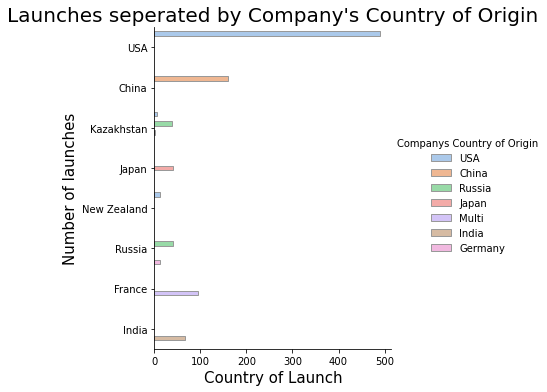

In [24]:
sns.catplot(y="Country of Launch", hue="Companys Country of Origin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

plt.xlabel("Country of Launch", fontsize=15)
plt.ylabel("Number of launches", fontsize=15)
plt.title("Launches seperated by Company's Country of Origin", fontsize=20)

# Observations
 - Using the country of launch and comapny's country of origin we can see that the United States had the largest amount of launches within their country
 - Russia had a few launches from Japanese companies 
 - Kazakhstan had a few US launches

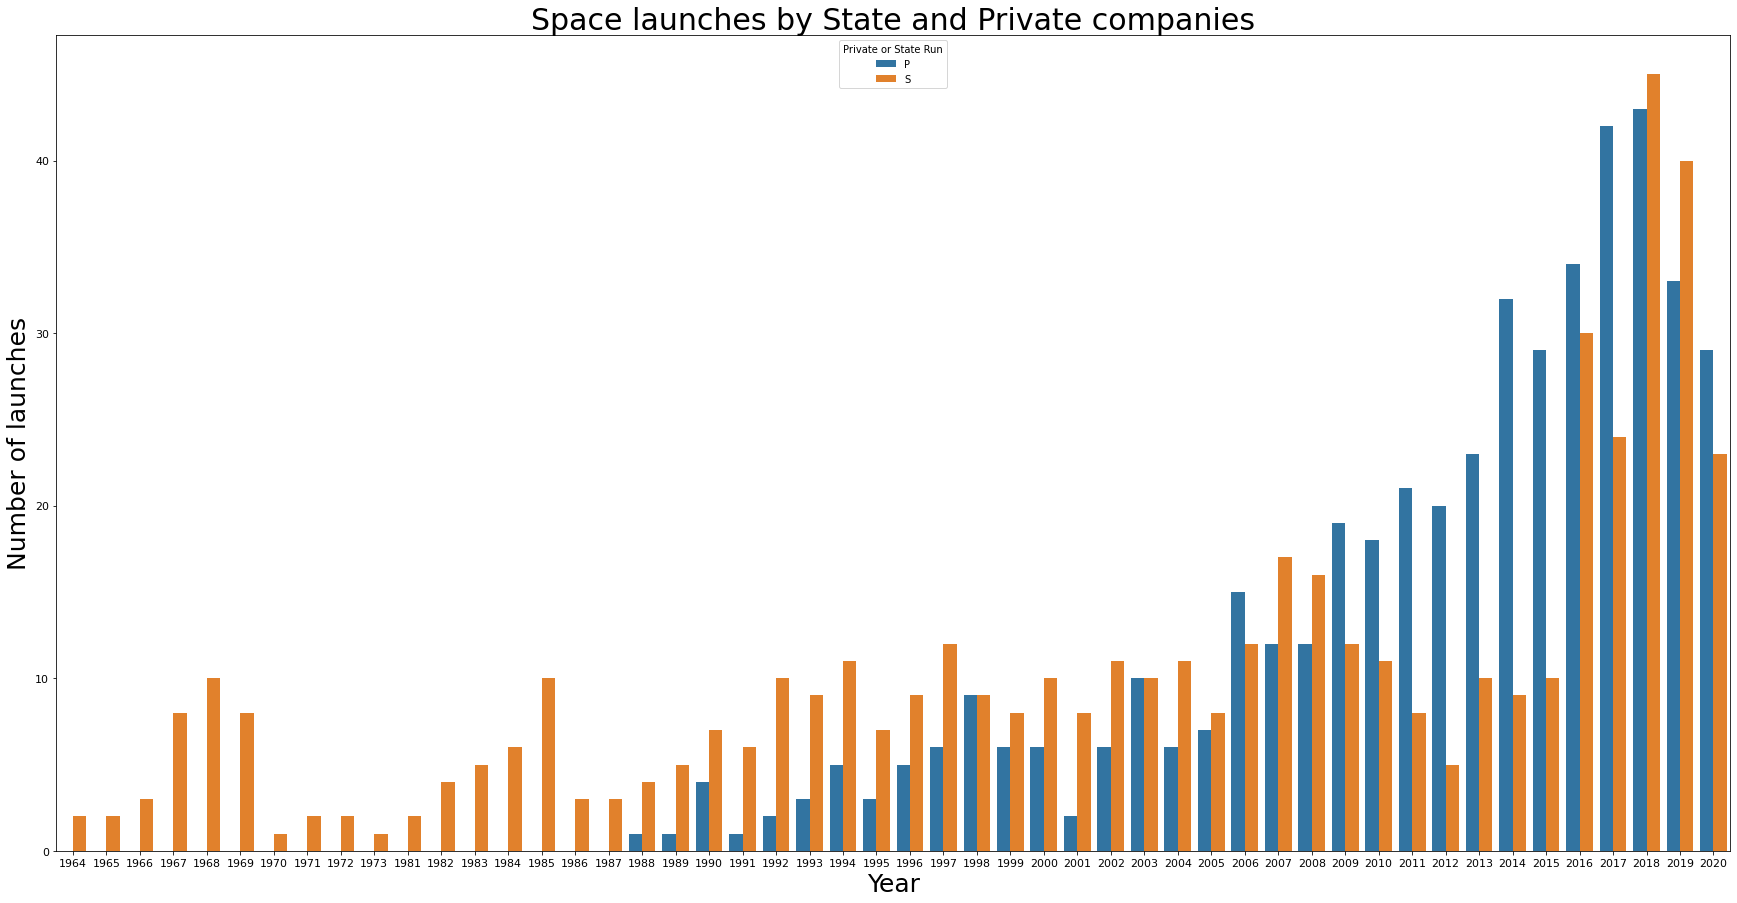

In [26]:
plt.figure(figsize=(30,15))
sns.countplot(data = df, x='Year', hue = 'Private or State Run')
plt.xlabel("Year", fontsize=25)
plt.ylabel("Number of launches", fontsize=25)
plt.title('Space launches by State and Private companies', fontsize=30)
plt.tick_params(labelsize=11)

# Observations:
- Privitization of Rocket launches began in 1998
- From 2006, there was a large spike in the privitization of rockets and for a few years after state 
   run launches decreased
- 2018 had the highest amount of both privitized and state run launches

# Space Launches by Year
As shown by the chart Privatization of space started 1988 but was not near the number of launches that State run organization had. There is a correlation from the rise of private launches and the fall of State run. This is to suggest that the rise of private launches are meeting some demand that until very recently State run organizations could not meet. This also ties back to our prior graph showing home more countrys now than ever are able to launch a rocket. This will make the access of space easier for more Countrys and Companys.

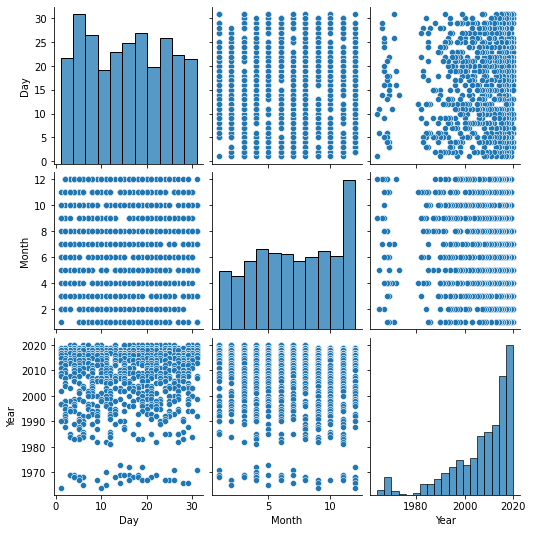

In [28]:
sns.pairplot(df,
    x_vars=['Day','Month','Year'],
    y_vars=['Day','Month','Year'])

# Observations

 - There is a sudden drop off of launches after the 1960-1970 boom. 
 - For what ever reason December has a lot more launches compared to the rest of the months.
 - Rocket launcheds have around the same chance to launch each day.
 - There seems to be an almost exponential increase in number of launches every year starting from 1980.

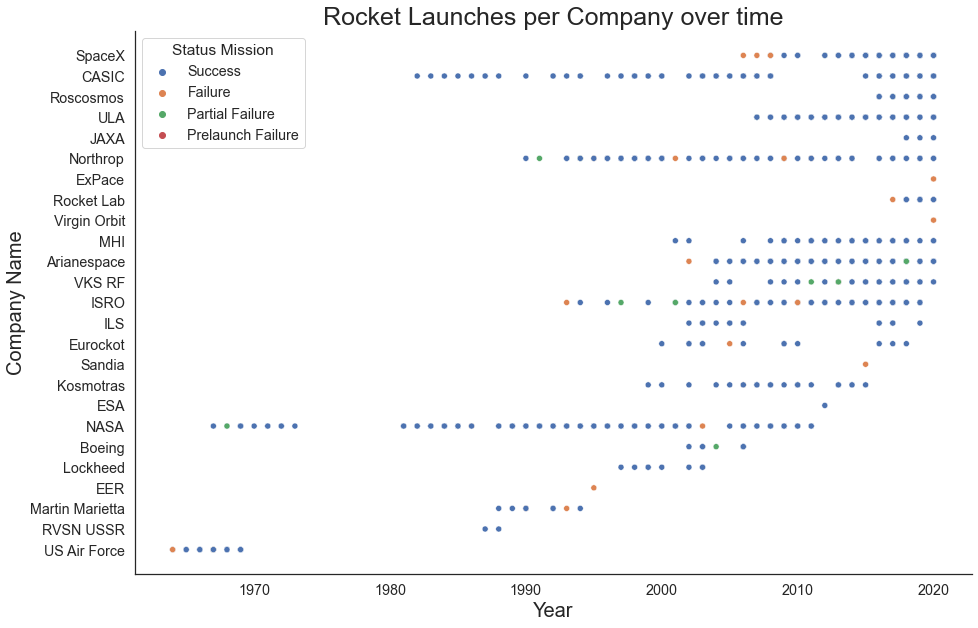

In [34]:
sns.set_theme(style="white",font_scale=1.3)
fig, ax=plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x='Year', y='Company Name', hue='Status Mission', data=df)
sns.despine()
plt.xlabel('Year', fontsize=20)
plt.ylabel('Company Name', fontsize=20)
plt.title('Rocket Launches per Company over time', fontsize=25)
plt.show()

# Observations
1. Casic has the most successful launches without any failures. 
2. NASA has the most space launches.
3. The US airforce had the first failure
4. The first partial failure was in 1965 from NASA

# Analysis

## Research Questions:
- Question 1: Which countries are pushing for privatization of Space Exploration?
- Question 2: Which countries have been most involved with space launches over the years?
- Question 3: How has the privatization of Space Exploration affected success rate and access to space?

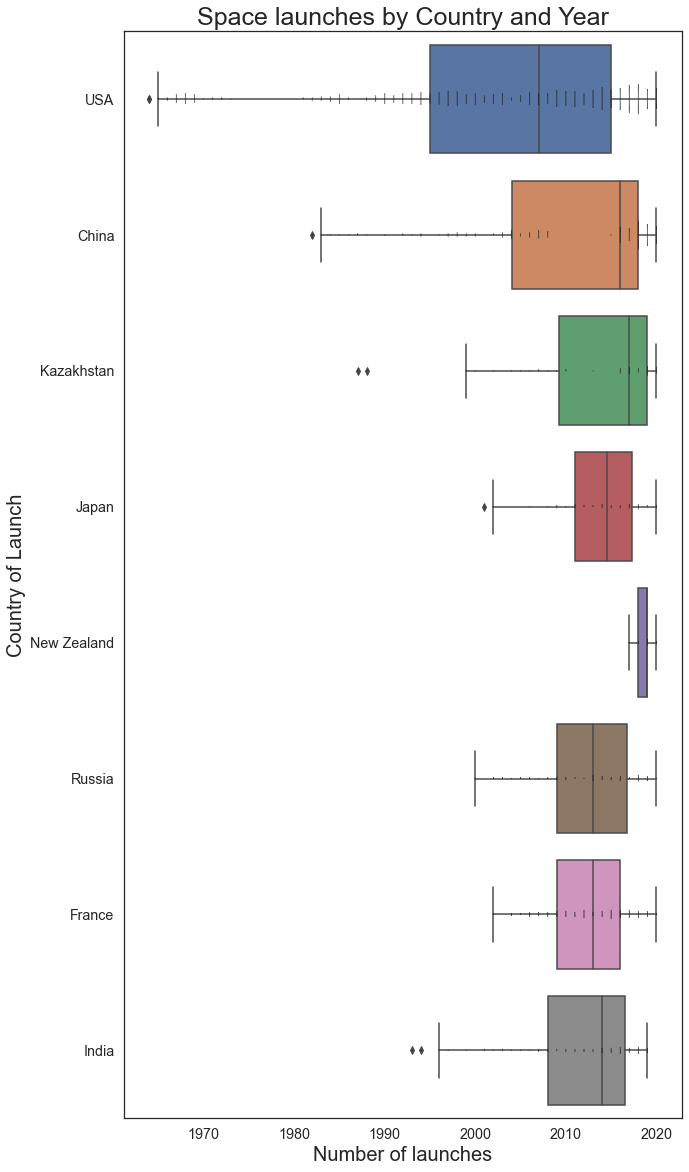

In [33]:
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Year", y="Country of Launch", data=df)
sns.swarmplot(x="Year", y="Country of Launch", data=df, size=1, color=".1")
plt.xlabel("Number of launches", fontsize=20)
plt.ylabel('Country of Launch', fontsize=20)
plt.title('Space launches by Country and Year', fontsize=25)
plt.show()

Note: USA is the most active in the field of Space Exploration today followed by China, who is new to the scene and is trying to compete with the USA.

Text(0.5, 1.0, 'Number of Launches by State and Private Companies by Country')

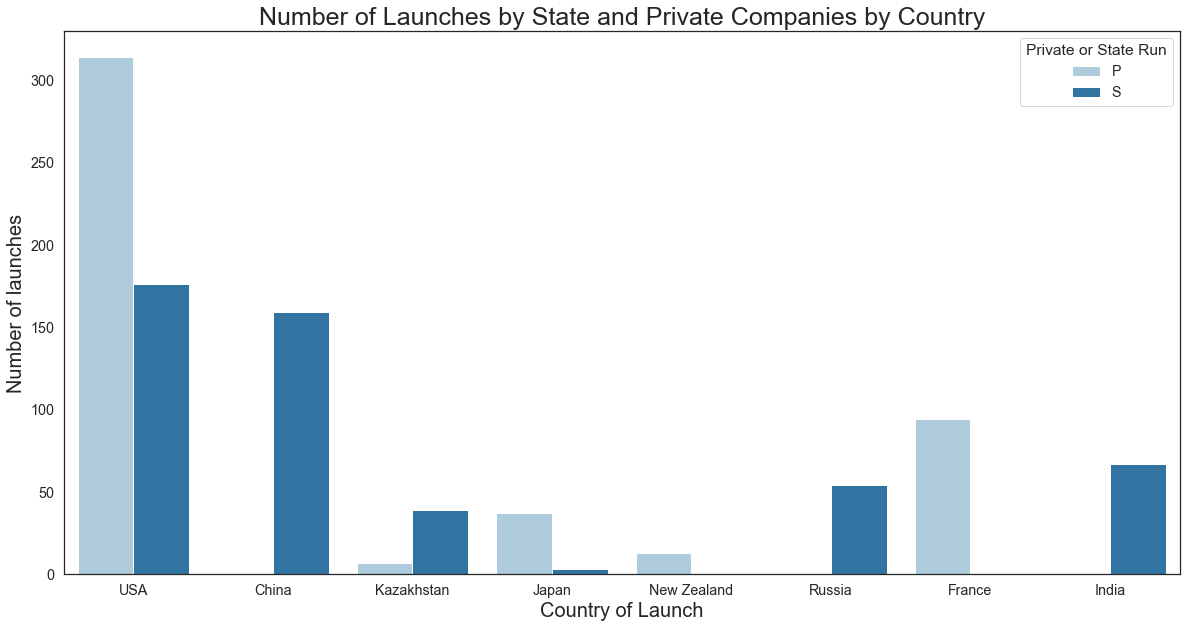

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(x='Country of Launch', hue='Private or State Run', data=df, palette="Paired")
plt.xlabel("Country of Launch", fontsize=20)
plt.ylabel("Number of launches", fontsize=20)
plt.title('Number of Launches by State and Private Companies by Country', fontsize=25)

Note: The USA has the most private and state run launches, while China, Russia and India have had no private launches.

Text(0.5, 1.0, 'Number of Successful and Failed Launches by State and Private Companies')

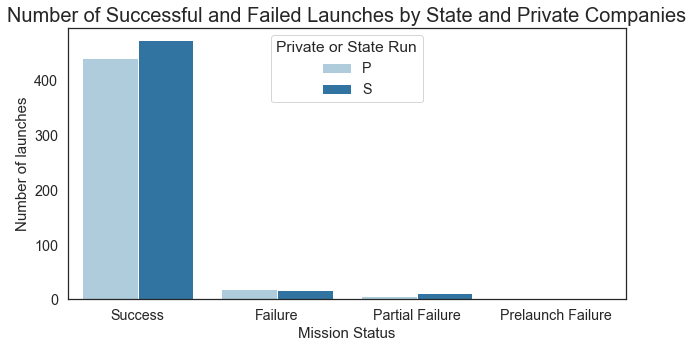

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Status Mission', hue='Private or State Run', data=df, palette="Paired")
plt.xlabel("Mission Status", fontsize=15)
plt.ylabel("Number of launches", fontsize=15)
plt.title('Number of Successful and Failed Launches by State and Private Companies', fontsize=20)

Note: The success rate does not seem to be greatly affected by whether the launch is done by state or private entities

## Analysis/Results
- Question 1: Which countries have been most involved with space launches over the years?

     - BoxPlot: As shown by the boxplot the USA and Soviet Union were the countries that had the most Space launches from the 1960s to 2000s. As private space launches become more common, Russia lowered the amount of launches while the USA was still launching rockets steadily. China has started to increase the amount of space launches after 2010 to compete with the USA. The boxplot also shows how more countries have access to space now than ever before, and that more private companies are launching their own rockets in the last decade than all the years before.
     
- Question 2: Which countries are pushing for privatization of Space Exploration?

     - CountPlot 1: According to this countplot the country that the United States has been the most involves in space launches and is the country that is privatizing their space launches the most. Certain countries like Russia and China do not have any private launches due to their authoritarian nature. India only recently opened up their space sector to private entities in October 2020, so they have yet to have any private launches.
     
- Question 3: How has the privatization of Space Exploration affected success rate and access to space?

     - CountPlot 2: This countplot allows us to see that space launches being backed by private entities do not seem to have a large difference in success rate compared to state launches. This means that the level of technology and expertise of private space companies are around the same level as state backed entities.   

## Conclusion

Looking at the basic Launch data we can gather a lot about how launches are conducted and who are the entities responsible for launching them. The data shows a trend of increased privatization of space exploration in countries that allow private companies in the space sector. While countries with only State programs are also increasing the number of launches to try to catch up to the USA, who is leading the privatization of space launches, in the space race. Although we have yet to see any tangible effects on the results of space launches due to the increase in private launches, we might soon see an acceleration of technological progress in this field as more private and state companies invest into projects to become the first to conquer the new frontier of space travel.